# Example 01

This example reproduces the results from Example 1 of from Quast & Wagner (2016)

The definition of the volume phase function and surface BRDF is as follows:

**Volume definition**

* optical depth ($\tau = 0.7$)
* single scattering albedo ($\omega = 0.3$)
* Volume phase function: Rayleigh phase function

**Surface definition**

* Cosine Lobe function with 10 coefficients

In [1]:
# imports
from rt1.rt1 import RT1 
from rt1.volume import Rayleigh   
from rt1.surface import CosineLobe 

import numpy as np
import pandas as pd

In [2]:
# definition of volume and surface
V = Rayleigh(tau=0.7, omega=0.3)
SRF = CosineLobe(ncoefs=10, i=5, NormBRDF=np.pi)

**Imaging geometry (backscattering case)**

In [3]:
# Specify imaging geometry
inc = np.arange(1.,89.,1.)  # specify incidence angle range [deg]
t_0 = np.deg2rad(inc)  # [rad]
# scattering angle; here the same as incidence angle, as backscatter
t_ex = t_0*1. 
# azimuth geometry angles
p_0 = np.ones_like(inc)*0. 
p_ex = np.ones_like(inc)*0. + np.pi  # 180 degree shift as backscatter

**Perform the simulations**

To perform the simulations, the RT model needs to estimate once coefficients. As these are the same for all imaging geometries, it makes sense to estimate these once and then transfer them to the subsequent calls, using the optional fn_input and _fnevals_input parameters.

In [4]:
# do actual calculations with specifies geometries
I0=1.  # set incident intensity
R = RT1(I0, t_0, t_ex, p_0, p_ex, V=V, SRF=SRF, geometry='mono', verbosity=1)
res = pd.DataFrame(dict(zip(('tot','surf','vol','inter'), R.calc())), index=inc)

generation of _fnevals functions...
symengine
evaluating fn-coefficients...


**Plot results**

Plot both, the phase function and the BRDF. For more examples, see [examples.py](examples.py)

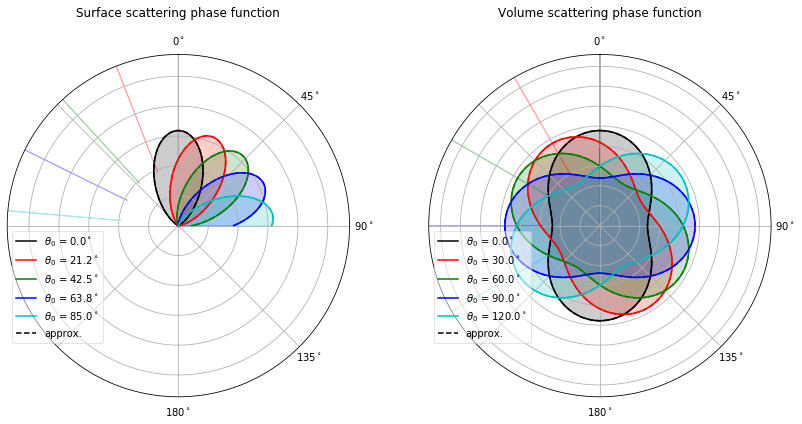

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 7))
ax1 = fig.add_subplot(111, projection='polar')
ax2 = fig.add_subplot(121, projection='polar')

# plot BRDF and phase function
plot1 = SRF.polarplot(inc = list(np.linspace(0,85,5)), multip = 1.5, legpos = (0.,0.5), polarax=ax2,
                     label='Surface scattering phase function', legend=True)
plot2 = V.polarplot(inc = list(np.linspace(0,120,5)) ,multip = 1.5, legpos = (0.0,0.5), polarax=ax1,
                     label='Volume scattering phase function', legend=True)

fig.tight_layout()
# plot only BRDF
#V.polarplot()
#plot only p
#SRF.polarplot()

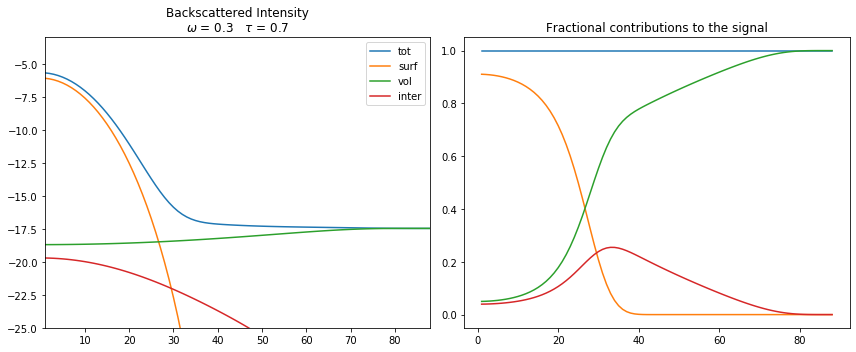

In [7]:
# plot backscatter as function of incidence angle

f, [ax, ax2] = plt.subplots(1,2, figsize=(12,5))
ax.set_title('Backscattered Intensity'+'\n$\\omega$ = ' + str(R.V.omega) + '$ \quad \\tau$ = ' + str(R.V.tau))
ax2.set_title('Fractional contributions to the signal')

resdb = 10.*np.log10(res[res!=0])
resdb.plot(ax=ax)
ax.legend()
ax2.plot(res.div(res.tot, axis=0))

_ = ax.set_ylim(-25,-3)
ax.set_ylim()
f.tight_layout()